In [224]:
import networkx as nx
import matplotlib.pyplot as plt
import os
import pickle
import random

# Load Last Graph

In [286]:
PROJECT_PATH = os.getcwd()
PATH = os.path.join(PROJECT_PATH, "..","output", "graph.pickle")
# Load the graph from the file
with open(PATH, "rb") as f:
    G = pickle.load(f)

In [287]:
DIRECTED = False
if not DIRECTED:
    G =  G.to_undirected()



# Visualize the graph

C:\Users\EdenYavin\AppData\Local\Temp\ipykernel_49956\2418441246.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodes = random.sample(G.nodes(), 20)


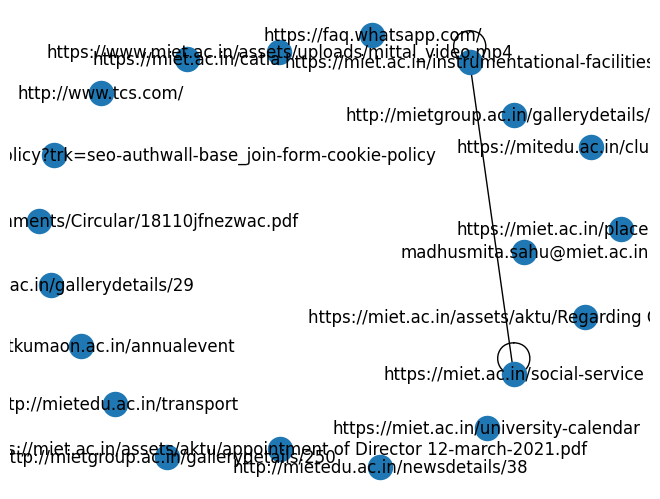

In [290]:
# select a random subset of nodes
nodes = random.sample(G.nodes(), 20)

# create a subgraph from the selected nodes
subgraph = G.subgraph(nodes)

pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True)
plt.show()

# Analysis

## Emails Nodes

In [291]:
emails_nodes = []
for node, data in G.nodes(data=True):
    if data and data['type'] == 'email':
        emails_nodes.append(node)

print(f"Number of nodes: {len(emails_nodes)}")

Number of nodes: 164


In [293]:
url_to_emails = {}
for node in G.nodes():
    url_to_emails[node] = 0

for edge in G.edges():
    src, dst = edge
    weight = G.get_edge_data(*edge)['weight']   # Email weights are 1
    if "@" not in src:
        url_to_emails[src] += weight
    if "@" not in dst:
        url_to_emails[dst] += weight



relevant = dict((x,y) for x,y in url_to_emails.items() if y > 0)
sorted(relevant.items(), key=lambda x: x[1], reverse=True)


[('https://miet.ac.in/applied-science-engineering', 75),
 ('https://miet.ac.in/pharmacy', 30),
 ('https://miet.ac.in/mca3', 20),
 ('https://miet.ac.in/mietb-school', 20),
 ('https://miet.ac.in/admission-cell', 15),
 ('https://miet.ac.in/business-incubator', 3),
 ('https://miet.ac.in/contact-us', 2),
 ('https://miet.ac.in/dean-students-welfare', 2),
 ('https://miet.ac.in/industrial-services', 2),
 ('https://miet.ac.in/idealab', 2),
 ('https://miet.ac.in/e-cell', 2),
 ('https://miet.ac.in', 1),
 ('https://miet.ac.in/online-registration', 1),
 ('https://miet.ac.in/institute-best-practices', 1),
 ('https://miet.ac.in/background', 1),
 ('https://miet.ac.in/vision-mission', 1),
 ('https://miet.ac.in/chairman', 1),
 ('https://miet.ac.in/vice-chairman', 1),
 ('https://miet.ac.in/director', 1),
 ('https://miet.ac.in/board-of-governor', 1),
 ('https://miet.ac.in/important-functionaries', 1),
 ('https://miet.ac.in/accreditation', 1),
 ('https://miet.ac.in/approval-affiliation', 1),
 ('https://mie

## URL nodes

In [295]:
url_nodes = []
for node, data in G.nodes(data=True):

    if data and data['type'] == 'links':
        url_nodes.append(node)

print(f"Number of nodes: {len(url_nodes)}")

Number of nodes: 1371


In [296]:
url_nodes

['http://miet.360-visit.in/',
 'https://miet.ac.in/feepayment-new',
 'https://miet.ac.in/feepayment-existing',
 'https://miet.ac.in/online-registration',
 'https://miet.ac.in/',
 'https://miet.ac.in/institute-best-practices',
 'https://miet.ac.in/background',
 'https://miet.ac.in/vision-mission',
 'https://miet.ac.in/chairman',
 'https://miet.ac.in/vice-chairman',
 'https://miet.ac.in/director',
 'https://miet.ac.in/board-of-governor',
 'https://miet.ac.in/important-functionaries',
 'https://miet.ac.in/accreditation',
 'https://miet.ac.in/approval-affiliation',
 'https://miet.ac.in/iqac',
 'https://miet.ac.in/committee',
 'https://miet.ac.in/btech',
 'https://miet.ac.in/pharmacy',
 'https://miet.ac.in/applied-science-engineering',
 'https://miet.ac.in/mtech',
 'https://miet.ac.in/mpharm',
 'https://miet.ac.in/mca3',
 'https://miet.ac.in/mietb-school',
 'http://mietedu.com/',
 'https://miet.ac.in/research-papers',
 'https://miet.ac.in/patents',
 'https://miet.ac.in/international-connect

## Domain Nodes

In [297]:
domain_nodes = set()
for node, data in G.nodes(data=True):
    if data:
        domain_nodes.add(data['domain'])

print(f"Number of nodes: {len(domain_nodes)}")

Number of nodes: 15


In [298]:
domain_nodes

{'accounts.google.com',
 'api.whatsapp.com',
 'docs.google.com',
 'forms.gle',
 'linkedin.com',
 'miet.360-visit.in',
 'miet.ac.in',
 'mietedu.ac.in',
 'mietedu.com',
 'mietgroup.ac.in',
 'mietincubator.com',
 'mietkumaon.ac.in',
 'mitedu.ac.in',
 'twitter.com',
 'youtube.com'}

# Try Different Centrality algorithms

## Note: The importance is only for url in each domain

### Get each domain cluster. We use networkx's strongly_connected_components function. Strongly connected component (SCC) is a subset of vertices in the graph such that for any two vertices u and v in the subset, there exists a directed path from u to v and a directed path from v to u. In other words, every vertex in the subset is reachable from every other vertex in the subset through directed paths.

In [299]:
nodes_for_each_domain = {}

for node, data in G.nodes(data=True):
    if not data:
        data['domain'] = node

    nodes_for_each_domain.setdefault(data['domain'], set()).add(node)



nodes_for_each_domain

{'miet.ac.in': {'Aakansha.vishnoi@miet.ac.in',
  'Devendra.arora@miet.ac.in',
  'Email-Helpline@Antiragging.In',
  'Kartik.sharma@miet.ac.in',
  'Lokendra.Kumar@miet.ac.in',
  'Neha.goel@miet.ac.in',
  'Nidhi.sharma.mca@miet.ac.in',
  'Nidhi.sharma@miet.ac.in',
  'RENU.SHARMA@MIET.AC.IN',
  'Sanchita.baroniya@gmail.com',
  'Shelly.arya@miet.ac.in',
  'Shibam.das@miet.ac.in',
  'Shubham.mittal@miet.ac.in',
  'Shweta.dumoga@miet.ac.in',
  'aarti.yadav@miet.ac.in',
  'aastha.panwar@miet.ac.in',
  'abhishek.kumar.ee@miet.ac.in',
  'abhishek.kumar@miet.ac.in',
  'aditi.bhardwaj@miet.ac.in',
  'aishwarya.singh@miet.ac.in',
  'akanksha.agarwal@miet.ac.in',
  'alimuddin.saifi@miet.ac.in',
  'amit.sharma.me@miet.ac.in',
  'anchal3895@gmail.com',
  'angesh.kumar@miet.ac.in',
  'anjali.sharma.mca@miet.ac.in',
  'anjana.sharma@miet.ac.in',
  'ankit040997@gmail.com',
  'ankush.gupta@miet.ac.in',
  'anoop.kumar@miet.ac.in',
  'ansari.aqsa0695@gmail.com',
  'anuj.sangwan@miet.ac.in',
  'anupam.d1982@

## Degree - In degree centrality: The in-degree centrality of a node in a directed graph is the sum of weights of all incoming edges to that node. Nodes with high in-degree centrality are often seen as more important or influential, as they receive a lot of connections from other nodes.

In [255]:
degree_centrality_per_domain = {}

degree_method = nx.degree_centrality if not DIRECTED else nx.in_degree_centrality

degree_in = degree_method(G)
for domain, cluster in nodes_for_each_domain.items():
    degree_centrality_per_domain[domain] = {}
    for node in cluster:
        degree_centrality_per_domain[domain][node] = degree_in[node]

    degree_centrality_per_domain[domain] = sorted(degree_centrality_per_domain[domain].items(), key=lambda x: x[1], reverse=True)

degree_centrality_per_domain

{'miet.ac.in': [('http://mietgroup.ac.in/pressmedia', 0.1968810916179337),
  ('https://miet.ac.in/applied-science-engineering', 0.1267056530214425),
  ('http://mietedu.ac.in', 0.1254061078622482),
  ('https://miet.ac.in/gallerys', 0.12410656270305392),
  ('https://miet.ac.in/our-recruiters', 0.1221572449642625),
  ('http://mitedu.ac.in', 0.12085769980506822),
  ('https://miet.ac.in/pharmacy', 0.10656270305393112),
  ('https://miet.ac.in/download-formats', 0.10656270305393112),
  ('https://miet.ac.in/mca3', 0.10006497725795971),
  ('https://miet.ac.in/mietb-school', 0.09486679662118258),
  ('https://miet.ac.in/set', 0.09421702404158544),
  ('https://miet.ac.in/btech', 0.08836907082521117),
  ('https://miet.ac.in/newsdrive', 0.08836907082521117),
  ('https://miet.ac.in/admission-cell', 0.08771929824561403),
  ('https://miet.ac.in/industrial-services', 0.08641975308641975),
  ('https://miet.ac.in/departments', 0.08576998050682261),
  ('https://miet.ac.in/central-library', 0.08382066276803

## PageRank - PageRank is a measure of centrality that takes into account both the number and quality of links to a node. It assigns a score to each node based on the importance of other nodes that link to it. Nodes with high PageRank scores are often seen as more important or influential.

In [256]:
pagerank_per_domain = {}
pagerank = nx.pagerank(G, weight='weight')
for domain, cluster in nodes_for_each_domain.items():
    pagerank_per_domain[domain] = {}
    for node in cluster:
        pagerank_per_domain[domain][node] = pagerank[node]

    pagerank_per_domain[domain] = sorted(pagerank_per_domain[domain].items(), key=lambda x: x[1], reverse=True)

pagerank_per_domain

{'miet.ac.in': [('contact@miet.ac.in', 0.08734228059184017),
  ('https://miet.ac.in/applied-science-engineering', 0.07686953464713529),
  ('https://miet.ac.in/pharmacy', 0.031078985444290434),
  ('https://miet.ac.in/mietb-school', 0.020359747044377544),
  ('https://miet.ac.in/mca3', 0.019886789836010742),
  ('https://miet.ac.in/admission-cell', 0.014275183829240458),
  ('https://miet.ac.in/business-incubator', 0.00328041116472739),
  ('https://miet.ac.in/idealab', 0.0032371854121128153),
  ('https://miet.ac.in/e-cell', 0.0032371854121128153),
  ('https://miet.ac.in/contact-us', 0.0022874790070259977),
  ('https://miet.ac.in/dean-students-welfare', 0.0022874790070259977),
  ('http://mietedu.ac.in', 0.002220351647628735),
  ('contact@kolaahal.com', 0.002220351647628735),
  ('https://accounts.google.com/signin/v2/identifier?continue=https%3A%2F%2Fmail.google.com%2Fmail%2F&ltmpl=default&hd=miet.ac.in&service=mail&sacu=1&rip=1&flowName=GlifWebSignIn&flowEntry=ServiceLogin',
   0.00222035164

## Closness: measures the mean distance from one node to any other node. The more central a node is, the closer it is to all the other nodes

In [257]:
closeness_per_domain = {}
closeness = nx.closeness_centrality(G, distance='weight')
for domain, cluster in nodes_for_each_domain.items():
    closeness_per_domain[domain] = {}
    for node in cluster:
        closeness_per_domain[domain][node] = closeness[node]

    closeness_per_domain[domain] = sorted(closeness_per_domain[domain].items(), key=lambda x: x[1], reverse=True)

closeness_per_domain

{'miet.ac.in': [('https://forms.gle/cozogjE4Kx8srJNH6', 6.623912423334759),
  ('https://miet.ac.in/placementdetails/251', 6.623912423334759),
  ('http://miet.ac.in/rangotsav', 6.623912423334759),
  ('https://miet.ac.in/gallerydetails/28', 6.623912423334759),
  ('https://miet.ac.in/extracircular', 6.623912423334759),
  ('https://www.feepayr.com/', 6.623912423334759),
  ('https://api.whatsapp.com/send?phone=+919927439439&text=Hi',
   6.623912423334759),
  ('https://miet.ac.in/mietlive', 6.623912423334759),
  ('https://miet.ac.in/vocational-courses', 6.623912423334759),
  ('https://miet.ac.in/academic-pedagogy', 6.623912423334759),
  ('https://miet.ac.in/set', 6.623912423334759),
  ('https://miet.ac.in/pharmacy', 6.623912423334759),
  ('https://miet.ac.in/sanskriti', 6.623912423334759),
  ('http://www.miet.ac.in', 6.623912423334759),
  ('https://miet.ac.in/gallerydetails/15', 6.623912423334759),
  ('http://www.ghclindia.com/', 6.623912423334759),
  ('https://www.miet.ac.in/', 6.6239124233

## Betweeness: Betweenness centrality measures the extent to which a node lies on the shortest paths between other nodes. In a directed weighted graph, the betweenness centrality algorithm takes into account both the weights and directions of the edges.

In [258]:
between_per_domain = {}
betweenness = nx.betweenness_centrality(G, weight='weight', normalized=True, endpoints=True)
for domain, cluster in nodes_for_each_domain.items():
    between_per_domain[domain] = {}
    for node in cluster:
        between_per_domain[domain][node] = betweenness[node]

    between_per_domain[domain] = sorted(between_per_domain[domain].items(), key=lambda x: x[1], reverse=True)

between_per_domain

{'miet.ac.in': [('http://mietgroup.ac.in/pressmedia', 2.86458357382178e+108),
  ('http://mietedu.ac.in', 1.5044166312617677e+74),
  ('https://miet.ac.in/international-connectmiet', 8.970393367715619e+69),
  ('https://miet.ac.in/mietb-school', 1.7520299546319568e+67),
  ('http://mitedu.ac.in', 1.8791560213706615e+65),
  ('https://miet.ac.in/our-recruiters', 1.4677239821441421e+50),
  ('https://miet.ac.in/gallerys', 1.615548208784858e+49),
  ('https://twitter.com/mietmeerut', 2.3949447548885416e+46),
  ('http://www.mitmeerut.ac.in/', 3.9448578750095276e+45),
  ('https://www.instagram.com/mietmeerut', 7.484202359026693e+44),
  ('https://www.linkedin.com/authwall?trk=gf&trkInfo=AQFeK5Wq-Iaq0AAAAWFQE13w4E_TxXAAmDam9XgEEZ1tP4BJtjXpKapFAvGW-qJG2lStmv-hdbmz9x5YHSk3df21zkAgdyL5dIHLlMqm3vT8j7dzwozP9l0fiVIgc2dp51DDy-o=&originalReferer=&sessionRedirect=https%3A%2F%2Fwww.linkedin.com%2Fschool%2Fmietgroup%2F',
   7.484202359026693e+44),
  ('https://www.youtube.com/channel/UCkoMkDAf-tTk23C9bGjLdrA',


## Eigenvector: Eigenvector centrality is a measure of the influence of a node in a network, where a node's influence is proportional to the influence of its neighbors

In [260]:
eigen_per_domain = {}
eigen_cen = nx.eigenvector_centrality(G, weight='weight', max_iter=50000)
for domain, cluster in nodes_for_each_domain.items():
    eigen_per_domain[domain] = {}
    for node in cluster:
        eigen_per_domain[domain][node] = eigen_cen[node]

    eigen_per_domain[domain] = sorted(eigen_per_domain[domain].items(), key=lambda x: x[1], reverse=True)

eigen_per_domain

{'miet.ac.in': [('contact@miet.ac.in', 0.6398815051746178),
  ('https://miet.ac.in/applied-science-engineering', 0.32303054285561084),
  ('https://miet.ac.in/pharmacy', 0.0962141110674222),
  ('https://miet.ac.in/mca3', 0.08546020349532332),
  ('https://miet.ac.in/mietb-school', 0.08435414186796612),
  ('https://miet.ac.in/admission-cell', 0.0820728746198547),
  ('https://miet.ac.in/industrial-services', 0.06788607845837034),
  ('https://miet.ac.in/business-incubator', 0.06773859086957669),
  ('https://miet.ac.in/contact-us', 0.06699592574360787),
  ('https://miet.ac.in/dean-students-welfare', 0.06699592574360787),
  ('https://miet.ac.in/extracircular', 0.06627707911013814),
  ('https://miet.ac.in/academic-pedagogy', 0.06627707911013814),
  ('https://miet.ac.in/set', 0.06627707911013814),
  ('https://miet.ac.in/annualevent', 0.06627707911013814),
  ('https://miet.ac.in/newsdetails/526', 0.06627707911013814),
  ('https://miet.ac.in/why-miet', 0.06627707911013814),
  ('https://miet.ac.in

### For example, lets investigate the largest cluster (domain)

In [261]:
# Find the largest cluster
max(dict((d,len(v)) for d,v in nodes_for_each_domain.items()).items(), key=lambda x: x[1])

('miet.ac.in', 836)

### Let's look at the largest cluster and how it's top 5 looks like

In [271]:
# Remove email nodes
valid_nodes = [n for n in eigen_per_domain['miet.ac.in'] if "@" not in n[0]]
# Find the top 5 in the cluster
top_5 = valid_nodes[:5]
top_5

[('https://miet.ac.in/applied-science-engineering', 0.32303054285561084),
 ('https://miet.ac.in/pharmacy', 0.0962141110674222),
 ('https://miet.ac.in/mca3', 0.08546020349532332),
 ('https://miet.ac.in/mietb-school', 0.08435414186796612),
 ('https://miet.ac.in/admission-cell', 0.0820728746198547)]

In [276]:
# Lets get the neighbors to see how it looks like
top_nodes = [tup[0] for tup in top_5]
neighbors = [list(G.neighbors(n)) for n in top_nodes]


In [277]:
print(neighbors[0])

['contact@miet.ac.in', 'http://miet.360-visit.in/', 'https://miet.ac.in/feepayment-new', 'https://miet.ac.in/feepayment-existing', 'https://miet.ac.in/online-registration', 'https://miet.ac.in/', 'https://miet.ac.in/institute-best-practices', 'https://miet.ac.in/background', 'https://miet.ac.in/vision-mission', 'https://miet.ac.in/chairman', 'https://miet.ac.in/vice-chairman', 'https://miet.ac.in/director', 'https://miet.ac.in/board-of-governor', 'https://miet.ac.in/important-functionaries', 'https://miet.ac.in/accreditation', 'https://miet.ac.in/approval-affiliation', 'https://miet.ac.in/iqac', 'https://miet.ac.in/committee', 'https://miet.ac.in/btech', 'https://miet.ac.in/pharmacy', 'https://miet.ac.in', 'http://miet.ac.in/feepayment-existing', 'http://miet.ac.in/feepayment-new', 'https://miet.ac.in/academic-calendar', 'https://miet.ac.in/academic-pedagogy', 'https://miet.ac.in/admission-cell', 'https://miet.ac.in/annualevent', 'https://miet.ac.in/anti-ragging-squad', 'https://miet.a

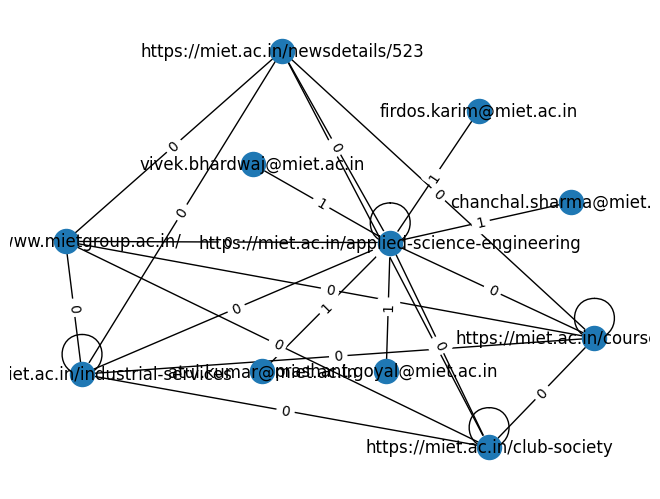

In [310]:
# Take random so that the graph will be seen
emails, urls = [n for n in neighbors[0] if 'type' in G.nodes[n] and G.nodes[n]['type'] == 'email'], [n for n in neighbors[0] if 'type' in G.nodes[n] and G.nodes[n]['type'] == 'links']
sample = [top_nodes[0]] + random.sample(emails, 5) + random.sample(urls, 5)
sub = G.subgraph(sample)


pos = nx.spring_layout(sub, k=1)
nx.draw(sub, pos, with_labels=True)
labels = nx.get_edge_attributes(sub, 'weight')
nx.draw_networkx_edge_labels(sub, pos, edge_labels={(u, v): d['weight'] for u, v, d in sub.edges(data=True)})
plt.show()

# Seems like indeed the nodes that are chosen to have a high concentration of emails and link with emails